In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qp
import GFE
import H_generator

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

# Set parameters and inilization

In [3]:
# Hamiltonian parameters
N = 4
J = 1
g = 2
E_shift_list = np.arange(8.5, 11, 0.05)

H = H_generator.build_Ising_model(N, J, g, E_shift_list[0])
h_list = H_generator.Ising_model_decomposition(N, J, g, E_shift_list[0])
QC = GFE.GFE_circuit()
QC.set_Hamiltonian(H)

# Prepare a random initial state
QC.gen_rand_initial_state(h_list, N)
qp.fileio.qsave(QC.ini_state, './data/rand_ini_state_for_qumode_assisted_simulation') # save it

# load the random initial state
ini_state = qp.fileio.qload('./data/rand_ini_state_for_qumode_assisted_simulation')
QC.set_initial_state(ini_state)

# qumode parameters
s = 1
cut = 50
max_cut = 100

Loaded Qobj object:
Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = (16, 1), type = ket



# Estimate the ground state energy with different shift-energy

In [4]:
succ_list = [] # successful projection rate, inverse measurement times required
E_error_list = [] # energy error
for E_shift in E_shift_list:
    H = H_generator.build_Ising_model(N, J, g, E_shift) # update shift-energy
    E_exact = H.eigenenergies()[0]
    QC.set_Hamiltonian(H)
    state = QC.solve_ground_state_with_qumode(s, cut, max_cut) # state solved (not normalizable)
    succ_prob = state.norm() # successful projection rate
    succ_list.append(succ_prob)
    state = state.unit() # normalization
    E_est = qp.expect(H, state) # energy estimated
    E_error_list.append(abs(E_est - E_exact))

# Shows the estimation error and measurement times as a function of shift-energy

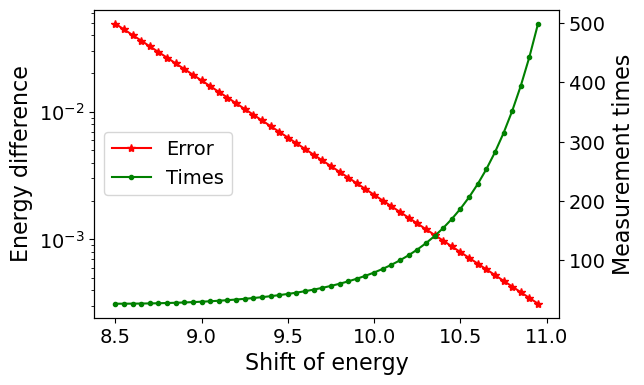

In [5]:
fig = plt.figure(figsize = [6, 4])

ax1 = fig.add_subplot(111)
l1, = ax1.plot(E_shift_list, E_error_list, 'r*-', label = 'Error')
ax1.set_xlabel('Shift of energy', fontsize=16)
ax1.set_ylabel('Energy difference', fontsize=16)
ax1.set_yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = ax1.twinx() 
l2, = ax2.plot(E_shift_list, 1/np.array(succ_list), 'g.-', label = 'Times')
ax2.set_ylabel('Measurement times', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(handles = [l1, l2,], labels = ['Error', 'Times'], loc = 6, fontsize=14)

plt.show()
#fig.savefig("./figures/Ising_continuous_random_ini_E_vs_shift_E", dpi = 300, bbox_inches = 'tight')